In [1]:
!ls ../Datos/OwnFats/

koi_light_curves_FATS2_metadata_test.csv
koi_light_curves_FATS2_metadata_test_model.csv
koi_light_curves_FATS2_metadata_test_model_p_error.csv
koi_light_curves_FATS2_metadata_test_p_error.csv
koi_light_curves_FATS2_metadata_train.csv
koi_light_curves_FATS2_metadata_train_model.csv
koi_light_curves_FATS2_metadata_train_model_p_error.csv
koi_light_curves_FATS2_metadata_train_p_error.csv


In [4]:
#metricas de evaluacion
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score,f1_score, confusion_matrix, mean_absolute_error,mean_squared_error, median_absolute_error
from sklearn.metrics import completeness_score, homogeneity_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

def calculate_metrics(y_true,y_pred):
    f1 = f1_score(y_true,y_pred,average="weighted")
    p = precision_score(y_true,y_pred,average=None,labels=[0,1]) #1 confirmado y 0 false positivo
    r = recall_score(y_true,y_pred,average=None,labels=[0,1])
    return f1,p,r

In [5]:
df_sets = pd.read_csv("../Datos/koi_sets_unb.csv") #new test set
mask_train = (df_sets["Set"] == "Train").values
mask_test = (df_sets["Set"] == "Test").values
#fijo para todos los datos
df_labels = pd.read_csv("../Datos/koi_metadata.csv")
df_labels_train = df_labels[mask_train]
df_labels_test = df_labels[mask_test]

In [6]:
y_train = ((df_labels_train["NExScI Disposition"]=="CONFIRMED")*1).values
y_test = ((df_labels_test["NExScI Disposition"]=="CONFIRMED")*1).values
df_labels_train.head()

,KOI Name,NExScI Disposition,Kepler Name,Period,Time of Transit Epoch,First Transit Time (BJD),Impact Parameter,Duration,Transit Depth,r/R,...,Teff,log(g),Metallicity,Stellar Radius,Stellar Mass,Max single event sigma,Max Multievent sigma,Transit Model SNR,KOI count,Transit Number
1,K01009.01,FALSE POSITIVE,NaN,5.092465,357.53594,2455190.536,0.161,3.65900,254.0,0.014,...,5037.0,4.547,-0.20,0.751,0.727,3.648,15.175,17.1,1,225
2,K07621.01,FALSE POSITIVE,NaN,275.073650,315.24860,2455148.249,0.595,3.37000,228.9,0.014,...,5604.0,4.226,-0.12,1.187,0.864,5.909,8.012,7.5,1,4
3,K06252.01,FALSE POSITIVE,NaN,8.460439,133.77449,2454966.774,1.061,4.73492,76412.9,0.478,...,5951.0,4.638,-1.06,0.702,0.796,452.526,3704.503,1797.4,1,164
6,K04162.01,FALSE POSITIVE,NaN,0.539366,131.97457,2454964.975,0.988,5.43400,145.0,0.016,...,6341.0,3.301,-0.10,5.302,2.050,4.847,9.076,57.6,1,1239
9,K00998.01,FALSE POSITIVE,NaN,161.788327,214.03900,2455047.039,0.267,5.31000,87750.0,0.273,...,6018.0,4.327,0.18,1.212,1.142,341.666,806.993,704.5,1,9


In [7]:
todos_ceros = np.zeros(y_test.shape)
todos_uno = np.ones(y_test.shape)

print("Score si dice todos son falsos positivos: %f"%f1_score(y_test,todos_ceros,average="weighted"))
print("Score si dice todos son confirmados: %f"%f1_score(y_test,todos_uno,average="weighted"))

Score si dice todos son falsos positivos: 0.547014
Score si dice todos son confirmados: 0.157445


/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/users/fmena/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


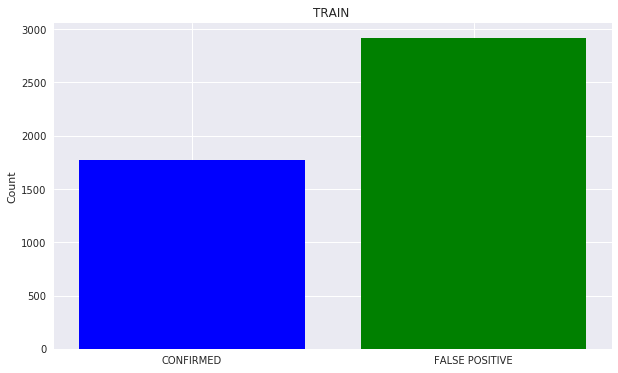

In [5]:
%matplotlib inline
plt.figure(figsize=(10,6))
plt.title("TRAIN ")
plt.bar(0, np.sum(y_train==1),color="blue")
plt.bar(1, np.sum(y_train==0),color="green")
plt.xticks([0,1],["CONFIRMED","FALSE POSITIVE"])
plt.ylabel("Count")

## VARIAR REPRESENTACION ACA:

In [8]:
#para distintas representaciones...
df_rep_train = pd.read_csv('../Datos/OwnFats_unb/koi_light_curves_FATS2_metadata_train_p_error.csv') #raw 
#df_rep_train = pd.read_csv('../Datos/OwnFats_unb/koi_light_curves_FATS2_metadata_train_model_p_error.csv') #model
df_rep_test = pd.read_csv('../Datos/OwnFats_unb/koi_light_curves_FATS2_metadata_test_p_error.csv') #raw
#df_rep_test = pd.read_csv('../Datos/OwnFats_unb/koi_light_curves_FATS2_metadata_test_model_p_error.csv') #model

#df_rep_train = pd.read_csv('../Datos/ICA_unb/koi_light_curves_FICA_train50_model.csv') 
#df_rep_test = pd.read_csv('../Datos/ICA_unb/koi_light_curves_FICA_test50_model.csv')

#df_rep_train = pd.read_csv('../Datos/PCA_unb/koi_light_curves_FPCA_train50_model.csv') 
#df_rep_test = pd.read_csv('../Datos/PCA_unb/koi_light_curves_FPCA_test50_model.csv')

#para fats2 
df_rep_train.fillna(df_rep_train.median(), inplace=True)
df_rep_test.fillna(df_rep_test.median(), inplace=True)
X_train = df_rep_train.values[:,:-1]
X_test = df_rep_test.values[:,:-1]

columns_names = df_rep_train.columns[:-1]

#all others
#X_train = df_rep_train.values
#X_test = df_rep_test.values

print(X_train.shape)

(4692, 72)


In [10]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
Xstd_train = std.fit_transform(X_train.astype('float'))
Xstd_test = std.transform(X_test)

/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Start training models

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, f1_score, recall_score, accuracy_score, precision_score

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score),
    'f1_score_we':make_scorer(f1_score,average='weighted'),
    'f1_score_macro':make_scorer(f1_score,average='macro'),
    'f1_score_micro':make_scorer(f1_score,average='micro')
}

#para guardar scores y graficar
f1_score_test = []
p_test = []
r_test = []

## K-NN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import pairwise

clf = KNeighborsClassifier(n_jobs=-1)

param_grid = {
    'n_neighbors' : np.arange(3,35),
    'weights': ["uniform","distance"],
    'metric': ['euclidean', 'cosine']
}

skf = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit='f1_score_we',
                       cv=skf, return_train_score=False, n_jobs=-1)
grid_search.fit(Xstd_train, y_train)

print('Best params for completeness:', grid_search.best_params_)
results = pd.DataFrame(grid_search.cv_results_)
bestResults = results[results.params == grid_search.best_params_]
preci = float(bestResults['mean_test_precision_score'])
print('Contamination: {:.4f}'.format(preci))
f1_w = float(bestResults['mean_test_f1_score_we'])
print('F1-score weighted: {:.4f}'.format(f1_w))
f1_ma = float(bestResults['mean_test_f1_score_macro'])
print('F1-score macro: {:.4f}'.format(f1_ma))
f1_mi = float(bestResults['mean_test_f1_score_micro'])
print('F1-score micro: {:.4f}'.format(f1_mi))

/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed para

/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed para

/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed para

/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed para

/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed para

/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed para

/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed para

KeyboardInterrupt: 

In [8]:
clf = KNeighborsClassifier(n_jobs=-1,**grid_search.best_params_)
clf.fit(Xstd_train,y_train) 

ypred_test = clf.predict(Xstd_test)
f1,p,r = calculate_metrics(y_test,ypred_test)
f1_score_test.append(f1)
p_test.append(p)
r_test.append(r)

## SVM with kernels

In [13]:
from sklearn.svm import SVC
clf = SVC(cache_size=20000) #high ram

param_grid = {
    'C' : [10.**i for i in np.arange(-5,5)],
    'kernel':['poly','rbf','sigmoid'],
    'class_weight' : ['balanced',None]
}

skf = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit='f1_score_we',
                       cv=skf, return_train_score=False, n_jobs=-1)
grid_search.fit(Xstd_train, y_train)

print('Best params for completeness:', grid_search.best_params_)
results = pd.DataFrame(grid_search.cv_results_)
bestResults = results[results.params == grid_search.best_params_]
completeness = float(bestResults['mean_test_recall_score'])
print('Completion: {:.4f}'.format(completeness))
preci = float(bestResults['mean_test_precision_score'])
print('Contamination: {:.4f}'.format(preci))
f1_w = float(bestResults['mean_test_f1_score_we'])
print('F1-score weighted: {:.4f}'.format(f1_w))
f1_ma = float(bestResults['mean_test_f1_score_macro'])
print('F1-score macro: {:.4f}'.format(f1_ma))
f1_mi = float(bestResults['mean_test_f1_score_micro'])
print('F1-score micro: {:.4f}'.format(f1_mi))

/users/fmena/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/users/fmena/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/users/fmena/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/users/fmena/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/users/fmena/anaconda3/lib/python3.6/site-packages/s

/users/fmena/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/users/fmena/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/users/fmena/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/users/fmena/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/users/fmena/anaconda3/lib/p

/users/fmena/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/users/fmena/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/users/fmena/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/users/fmena/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/users/fmena/anaconda3/lib/python3

/users/fmena/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/users/fmena/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/users/fmena/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/users/fmena/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/users/fmena/anaconda3/lib/python3.6/site-pack

Best params for completeness: {'C': 10.0, 'class_weight': None, 'kernel': 'rbf'}
Completion: 0.9240
Contamination: 0.9007
F1-score weighted: 0.9328
F1-score macro: 0.9288
F1-score micro: 0.9327


In [14]:
model = SVC(cache_size=20000, **grid_search.best_params_)
model.fit(Xstd_train,y_train)

ypred_test = model.predict(Xstd_test)
f1,p,r = calculate_metrics(y_test,ypred_test)

f1_score_test.append(f1)
p_test.append(p)
r_test.append(r)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=-1, random_state=0)

param_grid = {
    'n_estimators' : [10,20,30,40,50,60,70,80,90,100],
    'min_samples_split': [2,5,10,15,20,25],
    #'max_depth': np.arange(5,25),
    'class_weight' : ['balanced','balanced_subsample',None]
}

skf = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit='f1_score_we',
                       cv=skf, return_train_score=False, n_jobs=-1)
grid_search.fit(X_train, y_train)

print('Best params for completeness:', grid_search.best_params_)
results = pd.DataFrame(grid_search.cv_results_)
bestResults = results[results.params == grid_search.best_params_]
completeness = float(bestResults['mean_test_recall_score'])
print('Completion: {:.4f}'.format(completeness))
preci = float(bestResults['mean_test_precision_score'])
print('Contamination: {:.4f}'.format(1-preci))
f1_w = float(bestResults['mean_test_f1_score_we'])
print('F1-score weighted: {:.4f}'.format(f1_w))
f1_ma = float(bestResults['mean_test_f1_score_macro'])
print('F1-score macro: {:.4f}'.format(f1_ma))
f1_mi = float(bestResults['mean_test_f1_score_micro'])
print('F1-score micro: {:.4f}'.format(f1_mi))

In [ ]:
f1_ad = []
p_ad = []
r_ad = []
feat_imp = []
for i in range(30):
    model = RandomForestClassifier(n_jobs=-1,**grid_search.best_params_) #ver que pasa si dejamos random state aca
    model.fit(X_train,y_train) 
 
    ypred_test = model.predict(X_test)
    f1,p,r = calculate_metrics(y_test,ypred_test)
    f1_ad.append(f1)
    p_ad.append(p)
    r_ad.append(r)
    feat_imp.append(model.feature_importances_)
f1_score_test.append(np.mean(f1_ad,axis=0))# por columna
p_test.append(np.mean(p_ad,axis=0)) #por columna
r_test.append(np.mean(r_ad,axis=0)) #por columna
feat_imp = np.mean(feat_imp,axis=0)

In [ ]:
f1_ad = []
p_ad = []
r_ad = []
feat_imp = []

model = RandomForestClassifier(random_state=0,n_jobs=-1,**grid_search.best_params_) 
model.fit(X_train,y_train) 

ypred_test = model.predict(X_test)
f1,p,r = calculate_metrics(y_test,ypred_test)
f1_score_test.append(f1)
p_test.append(p)
r_test.append(r)
feat_imp = model.feature_importances_

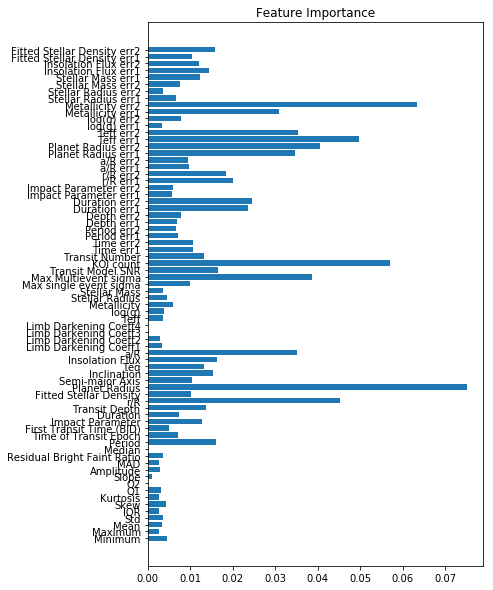

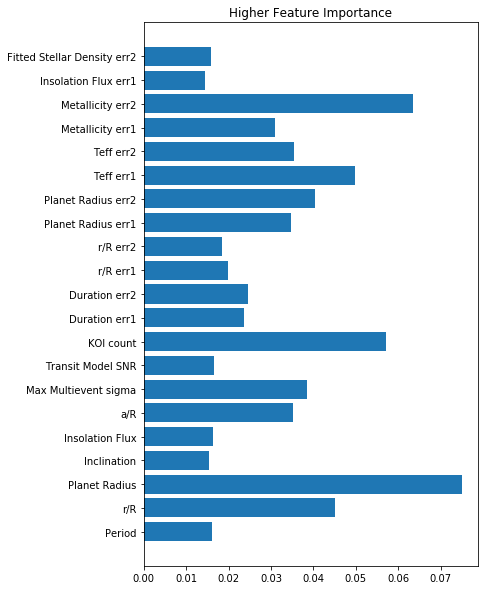

In [16]:
plt.figure(figsize=(6,10))
plt.barh(range(len(columns_names)), feat_imp)
plt.yticks(range(len(columns_names)),columns_names)#, rotation= 30)
plt.title('Feature Importance')
plt.show()

k = 20
most_relevant = feat_imp >= np.sort(feat_imp)[::-1][k] #mask
plt.figure(figsize=(6,10))
plt.barh(range(len(columns_names[most_relevant])), feat_imp[most_relevant])
plt.yticks(range(len(columns_names[most_relevant])),columns_names[most_relevant])#, rotation= 30)
plt.title('Higher Feature Importance')
plt.show()

# Gráficos

In [ ]:
import matplotlib.pyplot as plt
learners = len(p_test)
M = np.arange(learners)
LABELS=["K-NN","SVM","RANDOM FOREST"]

/users/fmena/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


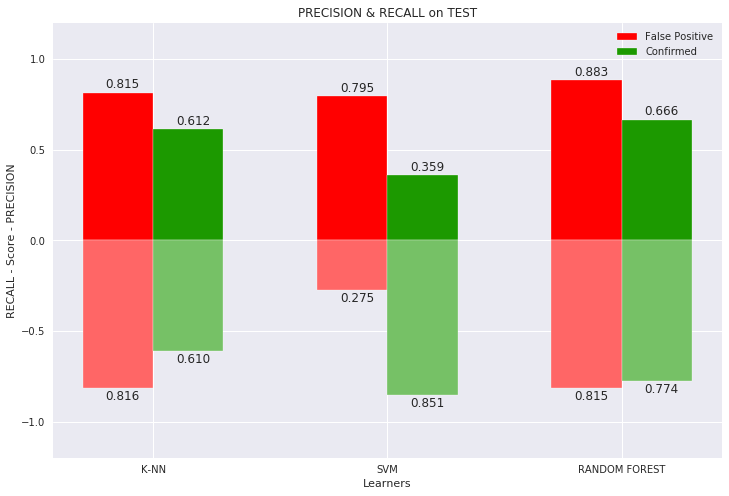

In [171]:
fig = plt.figure(figsize=(12,8))

#PRECISION SCORES
aux = list(map(list, zip(*p_test))) #transpose
plt.bar(M-0.15, aux[0], width=0.3,facecolor='#ff0000', edgecolor='white',label="False Positive")
plt.bar(M+0.15, aux[1], width=0.3,facecolor='#1C9900', edgecolor='white',label="Confirmed")

#RECALL SCORES
aux = list(map(list, zip(*r_test))) #transpose
plt.bar(M-0.15, np.array(aux[0])*-1, width=0.3,facecolor='#FF6666', edgecolor='white')
plt.bar(M+0.15, np.array(aux[1])*-1, width=0.3,facecolor='#76C166', edgecolor='white')

#ANOTATIONS OF SCORES
for x, (a,b) in zip(M, p_test):
    plt.text(x + 0.02-0.15, a + 0.01, '%.3f' % a, ha='center', va='bottom')#fp
    plt.text(x + 0.02+0.15, b + 0.01, '%.3f' % b, ha='center', va='bottom')#conf
for x, (a,b) in zip(M, r_test):
    plt.text(x + 0.02-0.15, -a - 0.01, '%.3f' % a, ha='center', va='top')#fp
    plt.text(x + 0.02+0.15, -b - 0.01, '%.3f' % b, ha='center', va='top')#conf
        
plt.xticks(M, LABELS)
plt.title("PRECISION & RECALL on TEST")   
plt.xlabel("Learners")  
plt.ylabel("RECALL - Score - PRECISION") 
plt.legend()
plt.ylim(-1.2,1.2)
plt.show()

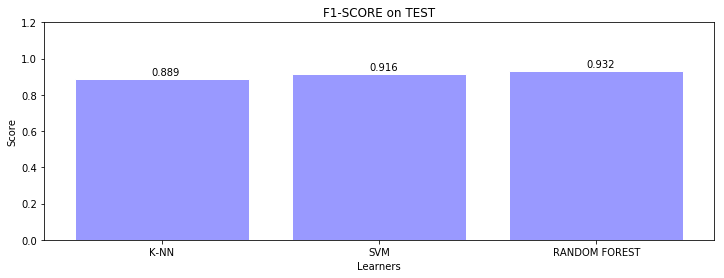

In [15]:
fig = plt.figure(figsize=(12,4))
plt.bar(M, f1_score_test, facecolor='#9999ff', edgecolor='white')

for x, y in zip(M, f1_score_test):
    plt.text(x + 0.02, y + 0.01, '%.3f' % y, ha='center', va='bottom')
    
plt.xticks(np.arange(learners), LABELS)
plt.title("F1-SCORE on TEST")   
plt.xlabel("Learners")  
plt.ylabel("Score") 
plt.ylim(0,1.2)
plt.show()

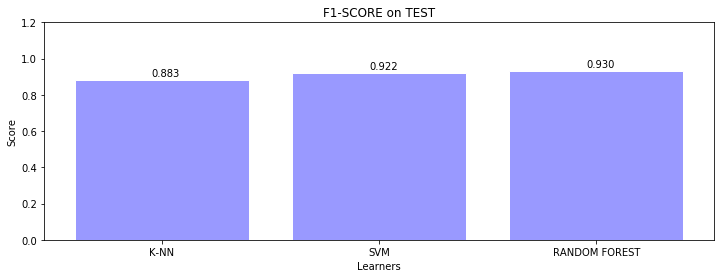

In [26]:
fig = plt.figure(figsize=(12,4))
plt.bar(M, f1_score_test, facecolor='#9999ff', edgecolor='white')

for x, y in zip(M, f1_score_test):
    plt.text(x + 0.02, y + 0.01, '%.3f' % y, ha='center', va='bottom')
    
plt.xticks(np.arange(learners), LABELS)
plt.title("F1-SCORE on TEST")   
plt.xlabel("Learners")  
plt.ylabel("Score") 
plt.ylim(0,1.2)
plt.show()

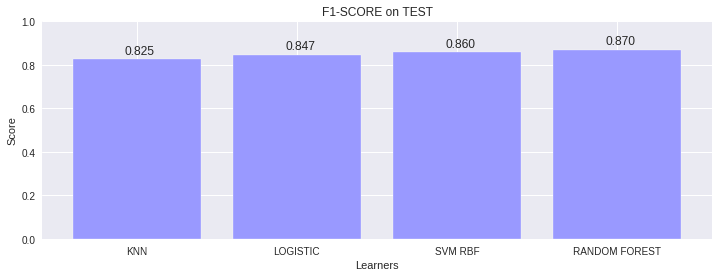

In [66]:
fig = plt.figure(figsize=(12,4))

plt.bar(M, f1_score_test, facecolor='#9999ff', edgecolor='white')

for x, y in zip(M, f1_score_test):
    plt.text(x + 0.02, y + 0.01, '%.3f' % y, ha='center', va='bottom')
    
plt.xticks(np.arange(learners), LABELS)
plt.title("F1-SCORE on TEST")   
plt.xlabel("Learners")  
plt.ylabel("Score") 
plt.ylim(0,1)
plt.show() #old code